In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("Advertising.csv")

In [3]:
data.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
# data validation 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data.shape

(200, 5)

In [6]:
data.count()

Unnamed: 0    200
TV            200
radio         200
newspaper     200
sales         200
dtype: int64

In [7]:
# Missing value calculation 
data.shape[0] - data.count()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [8]:
# to find missing values 
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [9]:
# Typo erros 
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [10]:
update_col=['srno', 'tv', 'radio', 'newspaper', 'sales']
update_col

['srno', 'tv', 'radio', 'newspaper', 'sales']

In [11]:
data.columns=update_col

In [12]:
data.head()

,srno,tv,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

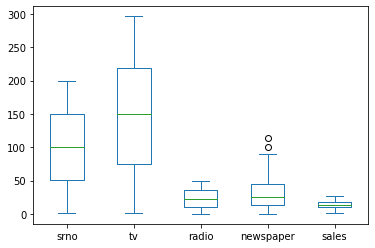

In [14]:
data.plot(kind="box")

<Figure size 576x576 with 0 Axes>

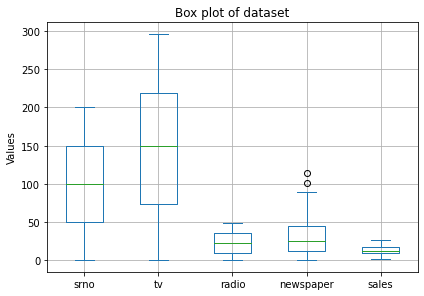

In [15]:
plt.figure (figsize=(8,8))
data.plot(kind="box")
plt.ylabel ("Values")
plt.tight_layout()
plt.title (f"Box plot of dataset")
plt.grid()
plt.show()



 number=50
 print(number)   

In [16]:
number= 50
print(number)

50


In [17]:
print("number",number)

number 50


In [18]:
print(f"number is{number}my lucky number is {number}")

number is50my lucky number is 50


In [19]:
# remove outliers
data.newspaper

0      69.2
1      45.1
2      69.3
3      58.5
4      58.4
       ... 
195    13.8
196     8.1
197     6.4
198    66.2
199     8.7
Name: newspaper, Length: 200, dtype: float64

In [20]:
data["newspaper"]

0      69.2
1      45.1
2      69.3
3      58.5
4      58.4
       ... 
195    13.8
196     8.1
197     6.4
198    66.2
199     8.7
Name: newspaper, Length: 200, dtype: float64

In [21]:
upper_acceptable_value=data["newspaper"].quantile(0.99)
print (f"upper_acceptable_value{upper_acceptable_value}")
data[data["newspaper"]>upper_acceptable_value]

upper_acceptable_value89.5149999999999


,srno,tv,radio,newspaper,sales
16,17,67.8,36.6,114.0,12.5
101,102,296.4,36.3,100.9,23.8


In [22]:
avinash_corr=data.corr()
avinash_corr

,srno,tv,radio,newspaper,sales
srno,1.000000,0.017715,-0.110680,-0.154944,-0.051616
tv,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

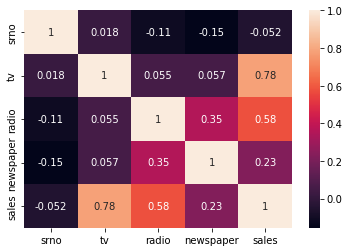

In [23]:
sns.heatmap(avinash_corr,annot=True)

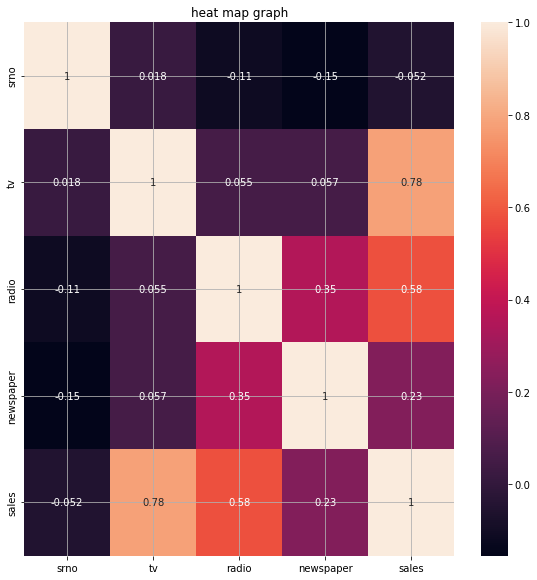

In [24]:
plt.figure (figsize=(8,8))
sns.heatmap(avinash_corr,annot=True)
plt.tight_layout()
plt.title(f"heat map graph")
plt.grid()
plt.show()


In [25]:
x=data.drop(["srno","sales"],axis=1)
x

,tv,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [28]:
y=data["sales"]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123,shuffle=True)
print(f"x training {x_train.shape}")
print(f"y training {y_train.shape}")
print(f"x_testing {x_test.shape}")
print(f"y testing {y_test.shape}")

x training (160, 3)
y training (160,)
x_testing (40, 3)
y testing (40,)


In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model_lr =LinearRegression()
model_lr

LinearRegression()

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model_lr =LinearRegression()
model_lr

LinearRegression()

In [37]:
# train model
model_lr.fit(x_train,y_train)

LinearRegression()

In [40]:
y_pred=model_lr.predict(x_test)
y_pred

array([12.5893486 ,  6.57466309, 15.51569107,  9.76164334, 14.08560255,
       20.17829056, 12.32800513, 19.82963814, 14.87331552, 10.31222767,
       10.12322859, 20.67028922,  6.53084946,  6.01905104,  3.57991965,
       11.29258057, 13.14446753, 15.95278361,  7.79731662, 18.014187  ,
        7.55638624, 11.66008132, 10.74032853,  7.35587039, 22.10561982,
       10.2894642 , 10.54321563, 14.89639115, 10.0460676 , 20.54318186,
        9.63429763, 21.12541362, 24.01131416,  6.77913882, 15.12282694,
       19.16513974, 18.44896906, 19.54139302, 16.23003217,  9.43340198])

In [45]:
import warnings
warnings.filterwarnings("ignore")


In [46]:
model_lr.predict([[120,56,78]])

array([18.79163566])

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [53]:
mse=mean_squared_error(y_test,y_pred)
print(f"mean square error is {mse}")
rmse=sqrt(mse)
print(f"Root mean square error is {rmse}")

mean square error is 2.203012979102849
Root mean square error is 1.4842550249545559


In [54]:
from sklearn.metrics import r2_score

In [63]:
r_squared=r2_score(y_test,y_pred)
print(f"R SQUARED IS {r_squared}")

R SQUARED IS 0.9288609285248163


In [64]:
# y=mx+c c= constant
print(f"Constant Value is {model_lr.intercept_}")

Constant Value is 2.9242267872501255


In [68]:
print(f"Slope m1,m2 and m3 {model_lr.coef_}")

Slope m1,m2 and m3 [ 0.04558897  0.18653389 -0.00063032]


# sales(y)=0.041*tv+0.190*radio+ (-0.0034) *newspaper + 3.6617(c)

In [69]:
import pickle
pickle.dump(model_lr,open("mymodel.pkl","wb"))